In [2]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [3]:
import pandas as pd

tracts = pd.read_csv(path_data+'tracts.csv').drop(columns=['index'])
tracts.head(), tracts.shape

(   state  county  tract  white  black
 0      1       1  20100   1601    217
 1      1       1  20200    844   1214
 2      1       1  20300   2538    647
 3      1       1  20400   4030    191
 4      1       1  20500   8438   1418,
 (74002, 5))

In [4]:
# exercise 01

"""
Calculating D for One State

In this exercise you will compute the Index of Dissimilarity for the state of Georgia. Remember that the formula for the Index of Dissimilarity is:

D = 1/2 * sum(abs((a/A )- (b/B)))

In this case, Group A will be Whites, Group B will be Blacks. and represent the White and Black population of the small geography (tracts), while A and B represent the White and Black population of the larger, containing geography (Georgia, postal code = GA, FIPS code = 13).

pandas has been imported using the usual alias, and the tracts DataFrame with population columns "white" and "black" has been loaded.
"""

# Instructions

"""


    Create the new DataFrame ga_tracts with only the tracts in Georgia ("state" column should equal FIPS code "13")

    Provide the column names in a list (use the variables w and b) to print the sum of Nonhispanic Whites and Blacks in Georgia

    Take the White population of each tract divided by the sum of the White population, and subtract the Black population of each tract divided by the sum of the Black population; use the w and b variables to improve code readability

"""

# solution

# Define convenience variables to hold column names
w = "white"
b = "black"

# Extract Georgia tracts
ga_tracts = tracts[tracts['state'] == 13]

# Print sums of Black and White residents of Georgia
print(ga_tracts[[w,b]].sum())

# Calculate Index of Dissimilarity and print rounded result
D = 0.5 * sum(abs(
  ga_tracts[w] / ga_tracts[w].sum() - ga_tracts[b] / ga_tracts[b].sum()))


print("Dissimilarity (Georgia):", round(D, 3))    

#----------------------------------#

# Conclusion

"""
Good job! But is 0.544 Dissimilarity high or low? Let's look at other states.
"""

white    5413920
black    2910800
dtype: int64
Dissimilarity (Georgia): 0.544


"\nGood job! But is 0.544 Dissimilarity high or low? Let's look at other states.\n"

In [5]:
# exercise 02

"""
Calculating D in a Loop

Is Georgia's Index of Dissimilarity of of 0.544 high or low? Let's compare it to Illinois (FIPS = 17), home of Chicago.

In this exercise we will use a loop to calculate D for all states, then compare Georgia and Illinois.

Remember that the formula for the Index of Dissimilarity is:

D = 1/2 * sum(abs((a/A )- (b/B)))

pandas has been imported using the usual alias, and the tracts DataFrame with population columns "white" and "black" has been loaded. The variables w and b have been defined with the column names "white" and "black".
"""

# Instructions

"""
    
    Use the unique() method on the "state" column to create a list of state FIPS codes.
    
    Use a for-loop to store each element of states (that is, each FIPS code) in a variable named state.
    
    Filter the tracts DataFrame on each value of state, and assign to tmp.
    
    Calculate D for each state by applying the formula to tmp, and store the result in the dictionary state_D.
"""

# solution

# Get list of state FIPS Codes
states = list(tracts["state"].unique())

state_D = {}  # Initialize dictionary as collector
for state in states:
    # Filter by state
    tmp = tracts[tracts['state']==state]
    
    # Add Index of Dissimilarity to Dictionary
    state_D[state] = 0.5 * sum(abs(tmp[w]/tmp[w].sum() - tmp[b]/tmp[b].sum()))

# Print D for Georgia (FIPS = 13) and Illinois (FIPS = 17)    
print("Georgia D =", round(state_D[13], 3))
print("Illinois D =", round(state_D[17], 3))

#----------------------------------#

# Conclusion

"""
Good work! Note that D for Illinois is much higher than for Georgia. In spite of the history of legal segregation in the American South, measures of segregation tend to be much higher for the industrialized cities (and their states) of the Northeast and Upper Midwest.
"""

Georgia D = 0.544
Illinois D = 0.73


'\nGood work! Note that D for Illinois is much higher than for Georgia. In spite of the history of legal segregation in the American South, measures of segregation tend to be much higher for the industrialized cities (and their states) of the Northeast and Upper Midwest.\n'

In [6]:
# exercise 03

"""
Calculating D Using Grouping in Pandas

Performing a calculation over subsets of a DataFrame is so common that pandas gives us an alternative to doing it in a loop, the groupby method. In the sample code, groupby is used first to group tracts by state, i.e. those rows having the same value in the "state" column. The sum() method is applied by group to the columns.

This exercise also makes use of merge, another useful pandas method, to join the grouped sums to the individual tracts. Don't worry about the syntax for now. merge will be explained in a later lesson.

pandas has been imported using the usual alias, and the tracts DataFrame with population columns white and black has been loaded. The variables w and b have been defined with the column names "white" and "black".
"""

# Instructions

"""

    Create sums_by_state using groupby and print the result.

    Create tracts using merge and print the result.

    Calculate abs(a_i/A - b_i/B) and store it in a new column D. (Reminder: The sum of White and Black populations ( A and B) was already calculated and is available in the tracts DataFrame in the columns suffixed with "_sum").

    Sum the column D by state using the groupby method, and multiply by 0.5.
"""

# solution

# Sum Black and White residents grouped by state
sums_by_state = tracts.groupby("state")[[w, b]].sum()
print(sums_by_state.head())

# Merge the sum with the original tract populations
tracts = pd.merge(tracts, sums_by_state, left_on = "state", 
    right_index = True, suffixes = ("", "_sum"))
print(tracts.head())

# Calculate inner expression of Index of Dissimilarity formula
tracts["D"] = abs(tracts[w] / tracts[w + "_sum"] - tracts[b] / tracts[b + "_sum"])

# Calculate the Index of Dissimilarity
print(0.5 * tracts.groupby("state")["D"].sum())

#----------------------------------#

# Conclusion

"""
Using group by, it's almost as easy to perform calculations for all states as it is for a single state. We see that the Index of Dissimilarity ranges for values under 0.4 for states like Vermont and Montana, but is over 0.7 for states like New York and Pennsylvania. Any guesses why?
"""

          white    black
state                   
1       3204402  1244437
2        455320    21949
4       3695647   239101
5       2173469   447102
6      14956253  2163804
   state  county  tract  white  black  white_sum  black_sum
0      1       1  20100   1601    217    3204402    1244437
1      1       1  20200    844   1214    3204402    1244437
2      1       1  20300   2538    647    3204402    1244437
3      1       1  20400   4030    191    3204402    1244437
4      1       1  20500   8438   1418    3204402    1244437
state
1     0.577199
2     0.493397
4     0.449351
5     0.645997
6     0.603343
8     0.619031
9     0.655174
10    0.434987
11    0.727364
12    0.577331
13    0.544327
15    0.478147
16    0.376311
17    0.729932
18    0.679997
19    0.560809
20    0.549658
21    0.578347
22    0.552229
23    0.527086
24    0.650004
25    0.607844
26    0.726007
27    0.577945
28    0.488833
29    0.700956
30    0.374149
31    0.636958
32    0.456794
33    0.424119
34    0.6

"\nUsing group by, it's almost as easy to perform calculations for all states as it is for a single state. We see that the Index of Dissimilarity ranges for values under 0.4 for states like Vermont and Montana, but is over 0.7 for states like New York and Pennsylvania. Any guesses why?\n"

In [15]:
def dissimilarity(df, col_A, col_B, group_by):
    
    # Sum Group A and Group B by grouping column
    grouped_sums = df.groupby(group_by)[[col_A, col_B]].sum()
    tmp = pd.merge(df, grouped_sums, left_on = group_by, 
                   right_index = True, suffixes = ("", "_sum"))
    
    # Calculate inner expression
    tmp["D"] = abs(tmp[col_A] / tmp[col_A + "_sum"] - tmp[col_B] / tmp[col_B + "_sum"])
    
    # Calculate Index of Dissimilarity and convert to DataFrame
    return 0.5 * tmp.groupby(group_by)["D"].sum().to_frame()

In [21]:
msa = pd.read_csv(path_data+'msa.csv').drop(columns=['index'])
msa_def = pd.read_csv(path_data+'msa_def.csv').drop(columns=['index'])
msa.head(), msa_def.head()

(                                             name  population  white  black  \
 0                         Adjuntas, PR Micro Area       19458    140      0   
 1  Aguadilla-Isabela-San Sebastián, PR Metro Area      305538   5602    231   
 2                            Coamo, PR Micro Area       71596    228     53   
 3                          Fajardo, PR Metro Area       70633    543    195   
 4                          Guayama, PR Metro Area       84017    271     95   
 
      msa  
 0  10260  
 1  10380  
 2  17620  
 3  21940  
 4  25020  ,
      msa      msa_name                    metro_micro          county_name  \
 0  10100  Aberdeen, SD  Micropolitan Statistical Area         Brown County   
 1  10100  Aberdeen, SD  Micropolitan Statistical Area       Edmunds County   
 2  10140  Aberdeen, WA  Micropolitan Statistical Area  Grays Harbor County   
 3  10180   Abilene, TX  Metropolitan Statistical Area      Callahan County   
 4  10180   Abilene, TX  Metropolitan Statistical 

In [ ]:
# exercise 04

"""
Joining Tracts and Metropolitan Areas

In order to focus on how the merge method works, a function that calculates the Index of Dissimilarity has been provided for you. (You will create this function yourself in the next exercise!)

To apply this function, you need to add the MSA identifiers to the tracts DataFrame. You will use state and county, present in both DataFrames, as the join keys. At the end, you will use seaborn's stripplot method to show the ten most segregated metros.

The tracts DataFrame that you have used previously is loaded. Population data by MSA is loaded as msa, and the first few rows are displayed in the console. Finally, msa_def is loaded with the counties that make up each MSA.

pandas and seaborn have been loaded with the usual aliases.
"""

# Instructions

"""

    Use the nlargest method on the msa DataFrame to return the 50 largest metros by "population".
    Both tracts and msa_def have columns "state" and "county". Use the merge method with the on parameter to join on these columns.
    Use the merge method to join msa and msa_D on the MSA identifier.

"""

# solution

# Find identifiers for 50 largest metros by population
msa50 = list(msa.nlargest(50, 'population')["msa"])

# Join MSA identifiers to tracts, restrict to largest 50 metros
msa_tracts = pd.merge(tracts, msa_def, on = ['state','county'])
msa_tracts = msa_tracts[msa_tracts["msa"].isin(msa50)]

# Calculate D using custom function, merge back into MSA
msa_D = dissimilarity(msa_tracts, "white", "black", "msa")
msa = pd.merge(msa, msa_D, on='msa')

# Plot ten most segregated metros
sns.stripplot(x = "D", y = "name", data = msa.nlargest(10, "D"))
plt.show()

#----------------------------------#

# Conclusion

"""
You made fast work of that! Notice that the top 10 most segregated metros are dominated by the old industrialized cities of the Northeast and Upper Midwest.
"""

In [23]:
# exercise 05

"""
Create Function to Calculate D

Calculating the Index of Dissimilarity requires multiple steps and has high reuse potential. In this exercise you will create the function dissimilarity that we used in the previous exercise. The function's input parameters will be a DataFrame of small area geographies (such as tracts) and three column names: the two columns with population counts of Group A and Group B, and the column with the names or geographic identifiers of the container geography (such as states or metro areas).

As a reminder, the formula the the Index of Dissimilarity is:

D = 1/2 * sum(abs((a/A )- (b/B)))

pandas has been imported using the usual alias. The groupby and merge are already completed for you in the code below.
"""

# Instructions

"""
Calculate the expression inside the absolute value bars based on the formula: The column names for and
are formed by adding the suffix "_sum" to the parameters col_A and col_B
The sum method on a single column returns a series; use the to_frame() method to convert the series to a DataFrame
Test the new function on tracts: calculate White-Black dissimilarity by MSA name
"""

# solution

def dissimilarity(df, col_A, col_B, group_by):

    # Sum Group A and Group B by grouping column
    grouped_sums = df.groupby(group_by)[[col_A, col_B]].sum()
    tmp = pd.merge(df, grouped_sums, left_on = group_by, 
                   right_index = True, suffixes = ("", "_sum"))
    
    # Calculate inner expression
    tmp["D"] = abs(tmp[col_A]/tmp[col_A + '_sum'] - tmp[col_B]/tmp[col_B + '_sum'])
    
    # Calculate Index of Dissimilarity and convert to DataFrame
    return 0.5 * tmp.groupby(group_by)["D"].sum().to_frame()
  
msa_D = dissimilarity(msa_tracts, 'white', 'black', "msa_name")
print(msa_D.head())

#----------------------------------#

# Conclusion

"""
Good job! We will make use of this function in future lessons. Usually we prefer to use geographic identifiers as join keys or, in this case, a grouping variable. This time we used the MSA name to make the results easier to understand.
"""

ValueError: cannot reindex on an axis with duplicate labels

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
msa = pd.read_csv(path_data+'msa_2.csv').drop(columns=['index'])

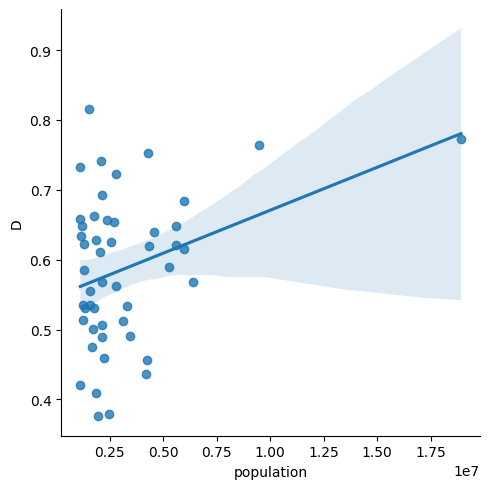

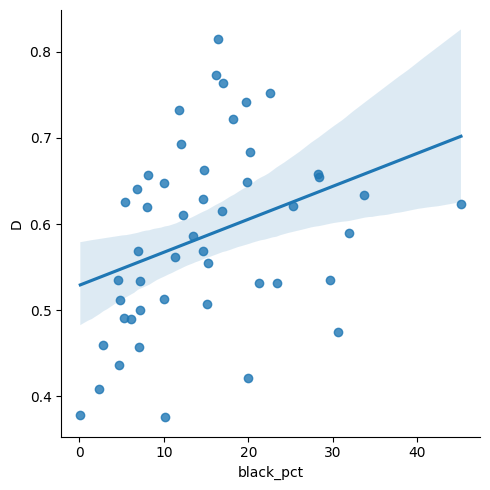

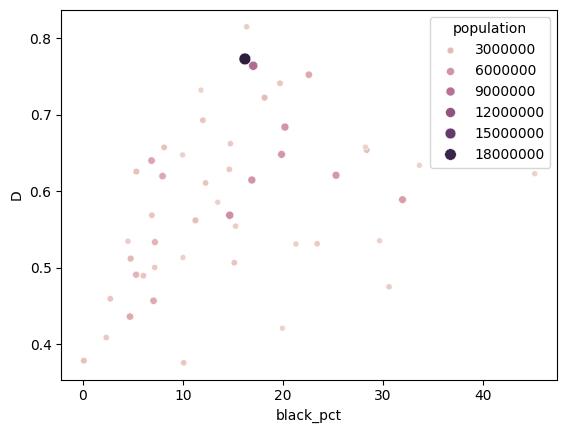

'\nWe have to be sensitive to the limitations of the measures we use. Is the Index of Dissimilarity showing that larger, more diverse metros are more segregated? A more likely explanation is that the index is not useful as a measure of segregation in very homogeneous metros.\n'

In [29]:
# exercise 06

"""
Characteristics of Segregated Metros

So, you've determined that segregation is higher in Northern industrialized metro areas. But these are also large, diverse metro areas. Are low diversity cities just getting a pass? Let's compare how size and diversity correlate with metropolitan segregation.

The msa DataFrame, as modified previously with the addition of the Index of Dissimilarity, has been loaded. The columns are listed in the console. Total population appears in the population column.

pandas and seaborn have been loaded using the usual aliases.
"""

# Instructions

"""

    Plot segregation on the y-axis vs. metropolitan population on the x-axis
    Calculate the percentage African-American, and assign to column black_pct
    Plot segregation vs. percentage African-American
    Create a scatterplot of segregation vs. percentage African-American. Add the size and hue parameters, both set to the column "population"

"""

# solution

# Plot segregation on the y-axis vs. metropolitan population on the x-axis
sns.lmplot(x='population', y='D', data=msa)
plt.show()

# Calculate percentage African-American
msa["black_pct"] = (msa["black"] / msa["population"]) * 100

# Plot segregation vs. percentage African-American
sns.lmplot(x='black_pct', y='D', data=msa)
plt.show()

# Display metro size, percent Black, and segregation in one plot
sns.scatterplot(x='black_pct', y='D', size='population', hue='population', data=msa)
plt.show()


#----------------------------------#

# Conclusion

"""
We have to be sensitive to the limitations of the measures we use. Is the Index of Dissimilarity showing that larger, more diverse metros are more segregated? A more likely explanation is that the index is not useful as a measure of segregation in very homogeneous metros.
"""

In [31]:
msa_black_emp = pd.read_csv(path_data+'msa_black_emp.csv').drop(columns=['index'])
msa_black_emp.head()

,male_lf,male_unemp,female_lf,female_unemp,msa
0,400843,68832,481425,74942,12060
1,30656,6194,35046,4939,25540
2,231346,32716,268923,31256,26420
3,55943,10781,71036,11696,26900
4,62434,11324,74028,11385,27260


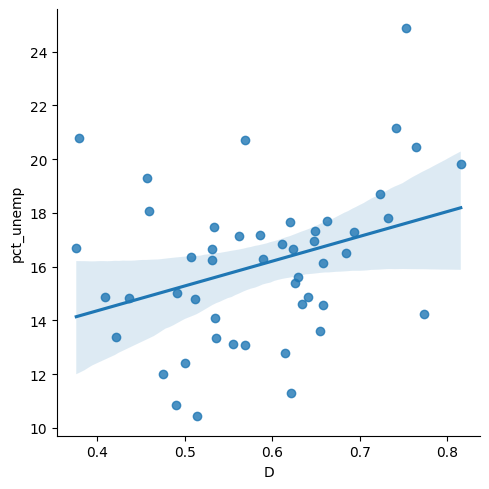

"\nIt looks like Black-White segregation has an impact on Black employment. But men and women participate in the labor force at different rates. Let's explore to see if there are differences by gender.\n"

In [32]:
# exercise 07

"""
Calculating Unemployment

In this exercise, you will plot metropolitan unemployment against segregation. Unemployment is calculated as a proportion of the labor force (people employed or seeking employment). msa_black_emp is loaded with counts of Black male and female unemployment and labor force participation taken from subject table C23002B in the 2012 5-year ACS. You will calculate unemployment percentages and join with the previously calculated Index of Dissimilarity, loaded in the DataFrame msa.

pandas and seaborn have been loaded using the usual aliases.
"""

# Instructions

"""

    View the first few rows of msa_black_emp in the console
    Calculate the percentages of male, female, and total unemployment as 100 times the unemployment count divided by the labor force count. Add male and female together for totals.
---

    Use pd.merge to join msa and msa_black_emp on the column "msa". This column is in both the left and right DataFrames.
---

    Use sns.lmplot to plot "D" on the x-axis and "pct_unemp" on the y-axis.

"""

# solution

## View the first few rows of msa_black_emp
#print(msa_black_emp.head())

# Calculate percentage unemployment for male, female, and all
msa_black_emp["pct_male_unemp"] = 100 * msa_black_emp["male_unemp"] / msa_black_emp["male_lf"]
msa_black_emp["pct_female_unemp"] = 100 * msa_black_emp["female_unemp"] / msa_black_emp["female_lf"]
msa_black_emp["pct_unemp"] = 100 * (msa_black_emp["female_unemp"] + msa_black_emp["male_unemp"]) / (msa_black_emp["female_lf"] + msa_black_emp["male_lf"])

# Merge with Index of Dissimilarity calculated previously
msa_black_emp = pd.merge(msa, msa_black_emp, on = "msa")

# Plot unemployment vs. segregation
sns.lmplot(x = 'D', y = 'pct_unemp', data = msa_black_emp)
plt.show()

#----------------------------------#

# Conclusion

"""
It looks like Black-White segregation has an impact on Black employment. But men and women participate in the labor force at different rates. Let's explore to see if there are differences by gender.
"""

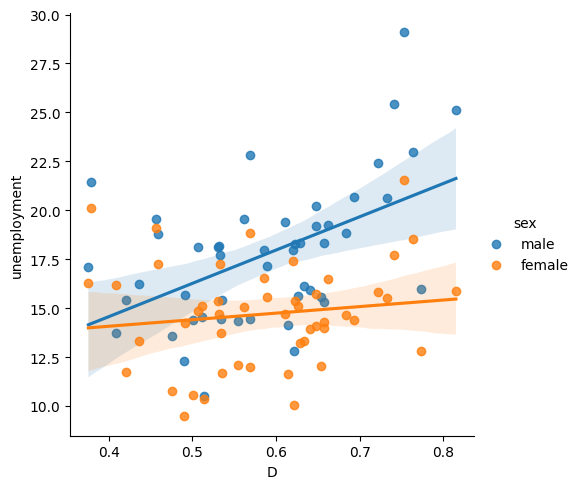

"\nWow! Segregation appears to have a much larger impact on male employment among African-Americans! Now let's see how this compares with White male employment.\n"

In [33]:
# exercise 08

"""
Impacts of Black-White Segregation by Sex

seaborn lets us plot two variables conditioned on a third variable. The two variables will be dissimilarity and unemployment, and we will condition the scatterplot on a third variable, sex, by changing the color of the points and regression line based on the sex being reported. But first we have to turn msa_black_emp into a "tidy" DataFrame.

msa_black_emp has been loaded, with columns "pct_male_unemp" and "pct_female_unemp" as calculated in the last exercise.

pandas and seaborn have been loaded using the usual aliases.
"""

# Instructions

"""

    Restrict msa_black_emp to only contain the columns "msa", "D", "pct_male_unemp", and "pct_female_unemp".
    Rename the columns to "msa", "D", "male", and "female". (Note, there is no change to the first two columns.)
---
    Use melt on tidy_black_emp to create a tidy DataFrame, with "msa" and "D" as the id_vars and "male" and "female" as the value_vars.
---

    Plot unemployment vs. dissimilarity. Set the hue parameter to "sex".

"""

# solution

# Restrict DataFrame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp", "pct_female_unemp"]]
tidy_black_emp.columns = ["msa", "D", "male", "female"]

# Use melt to create tidy DataFrame, and view the first few rows
tidy_msa_emp = tidy_black_emp.melt(id_vars = ["msa", "D"], 
    value_vars = ["male", "female"], var_name = "sex", 
    value_name = "unemployment")

# Visually compare male and female unemployment
sns.lmplot(x='D', y='unemployment', hue = 'sex', data = tidy_msa_emp)
plt.show()

#----------------------------------#

# Conclusion

"""
Wow! Segregation appears to have a much larger impact on male employment among African-Americans! Now let's see how this compares with White male employment.
"""

In [35]:
msa_white_emp = pd.read_csv(path_data+'msa_white_emp.csv').drop(columns=['index'])
msa_white_emp.head()

,name,male_lf,male_unemp,female_lf,female_unemp,msa,pct_male_unemp,pct_female_unemp,pct_unemp
0,"Abbeville, LA Micro Area",12441,637,9406,613,10020,5.120167,6.517117,5.721609
1,"Aberdeen, SD Micro Area",10525,315,9673,229,10100,2.992874,2.367414,2.693336
2,"Aberdeen, WA Micro Area",14518,2591,12761,1515,10140,17.846811,11.872110,15.051871
3,"Abilene, TX Metro Area",30939,1880,29942,1543,10180,6.076473,5.153296,5.622444
4,"Ada, OK Micro Area",6968,449,6426,363,10220,6.443743,5.648926,6.062416


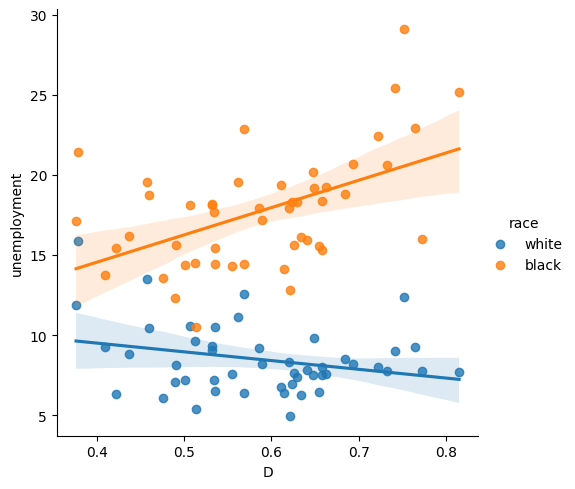

'\nNot only is Black male unemployment higher in more segregated areas, but White male unemployment is lower. Black male unemployment may be higher due to "spatial mismatch", or not living near job opportunities. But why would White unemployment be lower? More research is necessary to find out, but it seems clear that segregation puts Black job-seekers at a disadvantage compared with Whites.\n'

In [36]:
# exercise 09

"""
White and Black Unemployment

In this exercise you will compare metropolitan unemployment between White and Black males. msa_black_emp is loaded. A new DataFrame, msa_white_emp, with data from table C23002A from the 2012 5-year ACS is also loaded. Percentage unemployment has already been calculated for you. You will restrict both DataFrames to the columns of interest (the ones showing percentage male employment), join the DataFrames, and melt them into a tidy DataFrame for visualization with seaborn.

pandas and seaborn have been loaded using the usual aliases.
"""

# Instructions

"""

    Create tidy_white_emp by restricting msa_white_emp to the columns "msa" and "pct_male_unemp", then rename the second column to "white"
    Merge tidy_black_emp and tidy_white_emp on the "msa" column; assign to tidy_emp
    Use melt on tidy_emp. The value_vars should be the names of the two race columns; set var_name to "race" and value_name to "unemployment"
    Plot unemployment vs. dissimilarity, conditioning on race using the hue parameter

"""

# solution

# Restrict DataFrame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp"]]
tidy_black_emp.columns = ["msa", "D", "black"]
tidy_white_emp = msa_white_emp[['msa','pct_male_unemp']]
tidy_white_emp.columns = ['msa','white']
tidy_emp = pd.merge(tidy_black_emp, tidy_white_emp, on='msa')

# Use melt to create tidy DataFrame
tidy_msa_emp = tidy_emp.melt(id_vars = ["msa", "D"], 
    value_vars = ['white','black'], var_name = 'race', 
    value_name = 'unemployment')

# Visually compare male and female unemployment
sns.lmplot(x='D', y='unemployment', hue='race', data = tidy_msa_emp)
plt.show()

#----------------------------------#

# Conclusion

"""
Not only is Black male unemployment higher in more segregated areas, but White male unemployment is lower. Black male unemployment may be higher due to "spatial mismatch", or not living near job opportunities. But why would White unemployment be lower? More research is necessary to find out, but it seems clear that segregation puts Black job-seekers at a disadvantage compared with Whites.
"""

In [37]:
tracts_cook = pd.read_csv(path_data+'tracts_cook.csv').drop(columns=['index'])
tracts_cook.head()

,state,county,tract,black_1990,black_2010,totalpop_1990,totalpop_2010
0,17,31,10100,3050,2390,6409,4854
1,17,31,10201,2658,2291,6524,6450
2,17,31,10202,520,935,2657,2818
3,17,31,10300,1618,1691,6835,6236
4,17,31,10400,734,707,5670,5042


/tmp/ipykernel_307823/4226065310.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tracts_cook['pct_black_2010'], kde=False)


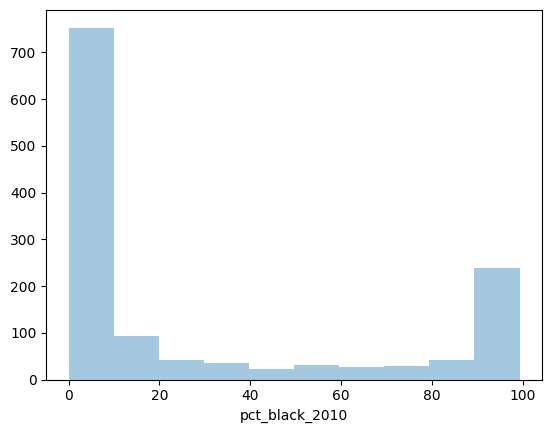

'\nGood work! The big gap in the middle of the histogram shows that, in heavily segregated areas like Cook County, very few Census tracts have a mix of Blacks and other races.\n'

In [38]:
# exercise 10

"""
Tract Demographics in a Segregated City

The first few rows of the tracts_cook DataFrame appear in the console. In this exercise, you will calculate the percent African-American in two time periods, examine the histogram of this variable for 2010, and then plot them against each other to see how they have changed. You will observe that tracts with a mix of Black and other races are more likely to increase their percentage of black residents over time.

pandas and seaborn are loaded using the usual aliases.
"""

# Instructions

"""

    Calculate the percent African-American of each tract in 2010 as 100 times the Black population in that year divided by the total population in that year
    Call sns.distplot on the new pct_black_2010 column of the tracts_cook DataFrame; make sure to set kde to False

"""

# solution

# Calculate percent Black in 2010
tracts_cook["pct_black_2010"] = 100 * tracts_cook['black_2010'] / tracts_cook['totalpop_2010']

# Examine histogram of percent Black
sns.distplot(tracts_cook['pct_black_2010'], kde=False)
plt.show()

#----------------------------------#

# Conclusion

"""
Good work! The big gap in the middle of the histogram shows that, in heavily segregated areas like Cook County, very few Census tracts have a mix of Blacks and other races.
"""

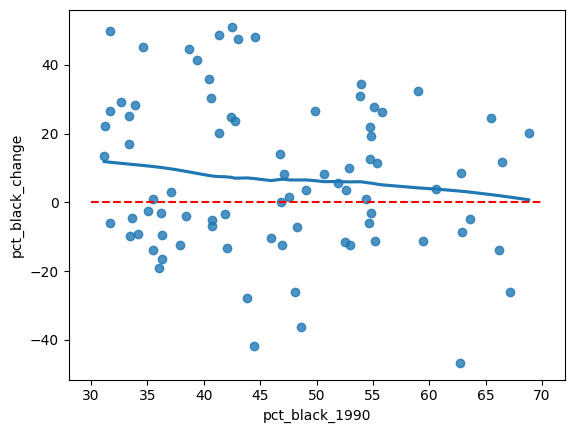

'\nNotice that the LOWESS curve (blue line) is above red reference line ("no change") everywhere except the top end of the range. These tracts all increased their percentage Black between 1990 and 2010. It looks like mixed race areas, the ones between 30% and 70% Black in 1990, are likely to become more segregated (less mixed) over time, that is, there are more tracts that fall above this red reference line than below it. This is a common and troubling phenomenon.\n'

In [39]:
# exercise 11

"""
Segregation Begets More Segregation

You have seen that there are relatively few tracts in Chicago with a mix of African-American and other races. How do these tracts evolve over time? tracts_cook is loaded, and you have already calculated the percent African-American in 2010. You will begin by doing the same for 1990, then calculate the percentage point change by subtracting this from the 2010 value. You will then use regplot to plot this change against the initial (1990) value.

In order to interpret the plot, you will add a red reference line to represent "no change". regplot also allows you to add a LOWESS curve (using lowess = True) to indicate the local trend in the data.

pandas and seaborn are loaded using the usual aliases.
"""

# Instructions

"""


    Calculate the percent African-American of each tract in 1990

    Calculate the percentage point change in African-American, by subtracting the 1990 value from the 2010 value

    In order to focus on the racially mixed tracks, restrict tracts_cook to those tracts where pct_black_1990 is between 30% and 70%

    Plot 1990-2000 change in Black percent (y-axis) vs percent Black in 1990 (x-axis); use lowess = True to add a smoothed trend curve

"""

# solution

# Calculate percent Black in 1990 and percentage point change from 1990 to 2000
tracts_cook["pct_black_1990"] = 100 * tracts_cook['black_1990'] / tracts_cook['totalpop_1990']
tracts_cook["pct_black_change"] = tracts_cook['pct_black_2010'] - tracts_cook["pct_black_1990"]

# Retain tracts between 30% and 70% Black in 1990
tracts_mixed = tracts_cook[(tracts_cook['pct_black_1990'] > 30) & (tracts_cook['pct_black_1990'] < 70)]

# Plot change vs. percent Black in 1990, with "no change" reference line
sns.regplot(x='pct_black_1990', y='pct_black_change', lowess=True, data = tracts_mixed)
plt.plot([30, 70], [0, 0], linestyle = "--", color = "red")
plt.show()

#----------------------------------#

# Conclusion

"""
Notice that the LOWESS curve (blue line) is above red reference line ("no change") everywhere except the top end of the range. These tracts all increased their percentage Black between 1990 and 2010. It looks like mixed race areas, the ones between 30% and 70% Black in 1990, are likely to become more segregated (less mixed) over time, that is, there are more tracts that fall above this red reference line than below it. This is a common and troubling phenomenon.
"""

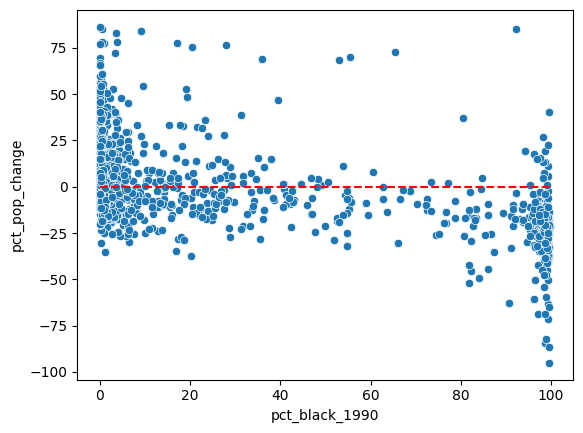

'\nNotice again that there are relatively few census tracts in Cook County with a mix of African-Americans and other races. Moreover, notice that a large majority of heavily African-American tracts (the right side of the plot) lost population–in some cases nearly all of their population.\n'

In [40]:
# exercise 12

"""
Population Decline in Segregated Neighborhoods

While some urban areas have gentrified, other areas are being abandoned. Does the racial makeup of a neighborhood affect population change? In this exercise you will plot population gain or loss between 1990 and 2010 (in percentage terms) against the percent African-American of each tract in 1990.

When you examine the histogram of percent population change, you will notice that a small number of tracts have increased by 200%, 500%, 1000% or more! These are generally new developments in very low populations tracts, and will make interpreting our next plot difficult, so you will filter them out before proceeding.

tracts_cook is still loaded for you. pandas and seaborn are loaded using the usual aliases.
"""

# Instructions

"""

    Calculate the percent population change from 1990 to 2010 as 100 times the population difference divided by the base year (1990) population
    
    Call sns.distplot on the new pct_pop_change column; make sure to set kde to False
---

    Filter tracts_cook to return only those counties where population growth is less than or equal to +100%, and assign to tracts_change

    Show a scatterplot of population change (on the y-axis) against percent Black in 1990 (on the x-axis)

"""

# solution

# Calculate percent population change 1990-2010
tracts_cook["pct_pop_change"] = 100 * (tracts_cook["totalpop_2010"] - tracts_cook["totalpop_1990"]) / tracts_cook["totalpop_1990"]

# Filter out very high growth census tracts
tracts_change = tracts_cook[(tracts_cook['pct_pop_change']<= 100)]

# Plot population change vs. percent Black in 1990
sns.scatterplot(x='pct_black_1990', y='pct_pop_change', data = tracts_change)
plt.plot([0, 100], [0, 0], linestyle = "--", color = "red")
plt.show()

#----------------------------------#

# Conclusion

"""
Notice again that there are relatively few census tracts in Cook County with a mix of African-Americans and other races. Moreover, notice that a large majority of heavily African-American tracts (the right side of the plot) lost population–in some cases nearly all of their population.
"""